In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.special import rel_entr
import pickle
from mpl_toolkits.mplot3d import axes3d
from scipy.ndimage.filters import gaussian_filter

import seaborn as sns

import matplotlib.patches as patches



import pandas as pd

import netCDF4

In [2]:
ny = 36
nx = 96
co_mesh = np.load("./conv_geo_mesh_center.npy")
co_mesh_x = np.load("./conv_geo_mesh_x.npy")
co_mesh_y = np.load("./conv_geo_mesh_y.npy")

al_mesh = np.load("./al_geo_mesh_center.npy")
al_mesh_x = np.load("./al_geo_mesh_x.npy")
al_mesh_y = np.load("./al_geo_mesh_y.npy")

co_facing = np.load("./gs_b2fgmtry.npy")
al_facing = np.load("./gs_b2fgmtry_al.npy")


co_new_mesh = np.load("./new_mesh_co_geo_mesh_center.npy")
co_new_mesh_x = np.load("./new_mesh_co_geo_mesh_x.npy")
co_new_mesh_y = np.load("./new_mesh_co_geo_mesh_y.npy")
co_newmesh_facing = np.load("./gs_new_mesh_co.npy")


al_new_mesh = np.load("./new_mesh_al_geo_mesh_center.npy")
al_new_mesh_x = np.load("./new_mesh_al_geo_mesh_x.npy")
al_new_mesh_y = np.load("./new_mesh_al_geo_mesh_y.npy")
al_newmesh_facing = np.load("./gs_new_mesh_al.npy")


newSAS_mesh = np.load("./new_SAS_geo_mesh_center.npy")
newSAS_mesh_x = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_mesh_y = np.load("./new_SAS_geo_mesh_y.npy")
newSAS_facing = np.load("./gs_new_SAS.npy")


print(np.shape(co_facing))
print(np.shape(al_facing))
def co_distance_center(first_point, second_point):
    x_range = x_co_meshinfo[first_point[1],first_point[0]]-x_co_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_meshinfo[first_point[1],first_point[0]]-y_co_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def co_distance_point(first_point, second_point):
    x_range = co_mesh_x[first_point[2],first_point[1],first_point[0]]-co_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_mesh_y[first_point[2],first_point[1],first_point[0]]-co_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_center(first_point, second_point):
    x_range = x_al_meshinfo[first_point[1],first_point[0]]-x_al_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_meshinfo[first_point[1],first_point[0]]-y_al_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_distance_point(first_point, second_point):
    x_range = al_mesh_x[first_point[2],first_point[1],first_point[0]]-al_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_mesh_y[first_point[2],first_point[1],first_point[0]]-al_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

#new geo files
def co_new_mesh_distance_center(first_point, second_point):
    x_range = x_co_new_meshinfo[first_point[1],first_point[0]]-x_co_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_co_new_meshinfo[first_point[1],first_point[0]]-y_co_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result
def co_new_mesh_distance_point(first_point, second_point):
    x_range = co_new_mesh_x[first_point[2],first_point[1],first_point[0]]-co_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = co_new_mesh_y[first_point[2],first_point[1],first_point[0]]-co_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def al_new_mesh_distance_center(first_point, second_point):
    x_range = x_al_new_meshinfo[first_point[1],first_point[0]]-x_al_new_meshinfo[second_point[1],second_point[0]]
    y_range = y_al_new_meshinfo[first_point[1],first_point[0]]-y_al_new_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def al_new_mesh_distance_point(first_point, second_point):
    x_range = al_new_mesh_x[first_point[2],first_point[1],first_point[0]]-al_new_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = al_new_mesh_y[first_point[2],first_point[1],first_point[0]]-al_new_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def newSAS_distance_center(first_point, second_point):
    x_range = x_newSAS_meshinfo[first_point[1],first_point[0]]-x_newSAS_meshinfo[second_point[1],second_point[0]]
    y_range = y_newSAS_meshinfo[first_point[1],first_point[0]]-y_newSAS_meshinfo[second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result

def newSAS_distance_point(first_point, second_point):
    x_range = newSAS_mesh_x[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_x[second_point[2],second_point[1],second_point[0]]
    y_range = newSAS_mesh_y[first_point[2],first_point[1],first_point[0]]-newSAS_mesh_y[second_point[2],second_point[1],second_point[0]]
    result = (x_range**2 + y_range**2)**(1/2)
    return result


def total_pressure(ne,te,na,ti):
    pr = ne[:,:]*te[:,:] + na[1,:,:]*ti[:,:] +np.sum(na[2:9,:,:]*ti[:,:],axis = 0)+np.sum(na[9:,:,:]*ti[:,:],axis = 0)
    return pr

def neutral_pressure(na,ti):
    pr = na[0,:,:]*ti[:,:]+ na[0,:,:]*ti[:,:]+ na[2,:,:]*ti[:,:]+na[2,:,:]*ti[:,:]+na[9,:,:]*ti[:,:]
    return pr
    
dumx_co_meshinfo = co_mesh[:,0]
dumy_co_meshinfo = co_mesh[:,1]
x_co_meshinfo = dumx_co_meshinfo.reshape(ny+2,nx+2)
y_co_meshinfo = dumy_co_meshinfo.reshape(ny+2,nx+2)

dumx_al_meshinfo = al_mesh[:,0]
dumy_al_meshinfo = al_mesh[:,1]
x_al_meshinfo = dumx_al_meshinfo.reshape(ny+2,nx+2)
y_al_meshinfo = dumy_al_meshinfo.reshape(ny+2,nx+2)

dumx_co_new_meshinfo = co_new_mesh[:,0]
dumy_co_new_meshinfo = co_new_mesh[:,1]
x_co_new_meshinfo = dumx_co_new_meshinfo.reshape(ny+2,nx+2)
y_co_new_meshinfo = dumy_co_new_meshinfo.reshape(ny+2,nx+2)

dumx_al_new_meshinfo = al_new_mesh[:,0]
dumy_al_new_meshinfo = al_new_mesh[:,1]
x_al_new_meshinfo = dumx_al_new_meshinfo.reshape(ny+2,nx+2)
y_al_new_meshinfo = dumy_al_new_meshinfo.reshape(ny+2,nx+2)

dumx_newSAS_meshinfo = newSAS_mesh[:,0]
dumy_newSAS_meshinfo = newSAS_mesh[:,1]
x_newSAS_meshinfo = dumx_newSAS_meshinfo.reshape(ny+2,nx+2)
y_newSAS_meshinfo = dumy_newSAS_meshinfo.reshape(ny+2,nx+2)


#po_dumx_meshinfo = convmesh[:,0]
#po_dumy_meshinfo = convmesh[:,1]
#po_x_meshinfo = dumx_meshinfo.reshape(4,ny+2,nx+2)
#po_y_meshinfo = dumy_meshinfo.reshape(4,ny+2,nx+2)
co_sep_out_target = np.zeros(2)
co_sep_out_target[0] = co_mesh_x[1,18,96]
co_sep_out_target[1] = co_mesh_y[1,18,96]
co_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_sep_out_target = np.zeros(2)
al_sep_out_target[0] = al_mesh_x[1,18,96]
al_sep_out_target[1] = al_mesh_y[1,18,96]
al_mesh_x_cen = np.sum(al_mesh_x, axis = 0)/4
al_mesh_y_cen = np.sum(al_mesh_y, axis = 0)/4

co_new_mesh_sep_out_target = np.zeros(2)
co_new_mesh_sep_out_target[0] = co_mesh_x[1,18,96]
co_new_mesh_sep_out_target[1] = co_mesh_y[1,18,96]
co_new_mesh_x_cen = np.sum(co_mesh_x, axis = 0)/4
co_new_mesh_y_cen = np.sum(co_mesh_y, axis = 0)/4

al_new_mesh_sep_out_target = np.zeros(2)
al_new_mesh_sep_out_target[0] = al_new_mesh_x[1,18,96]
al_new_mesh_sep_out_target[1] = al_new_mesh_y[1,18,96]
al_new_mesh_x_cen = np.sum(al_new_mesh_x, axis = 0)/4
al_new_mesh_y_cen = np.sum(al_new_mesh_y, axis = 0)/4

newSAS_sep_out_target = np.zeros(2)
newSAS_sep_out_target[0] = newSAS_mesh_x[1,18,96]
newSAS_sep_out_target[1] = newSAS_mesh_y[1,18,96]
newSAS_mesh_x_cen = np.sum(newSAS_mesh_x, axis = 0)/4
newSAS_mesh_y_cen = np.sum(newSAS_mesh_y, axis = 0)/4



X_point = []



co_sep_out_target_dist = np.zeros(ny+2)
co_sep_in_target_dist = np.zeros(ny+2)     
co_sep_out_midplane_dist = np.zeros(ny+2)
co_sep_in_midplane_dist = np.zeros(ny+2)

co_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
co_new_mesh_sep_out_target_dist = np.zeros(ny+2)
co_new_mesh_sep_in_target_dist = np.zeros(ny+2)

al_sep_out_midplane_dist = np.zeros(ny+2)
al_sep_in_midplane_dist = np.zeros(ny+2)
al_sep_out_target_dist = np.zeros(ny+2)
al_sep_in_target_dist = np.zeros(ny+2)


al_new_mesh_sep_out_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_in_midplane_dist = np.zeros(ny+2)
al_new_mesh_sep_out_target_dist = np.zeros(ny+2)
al_new_mesh_sep_in_target_dist = np.zeros(ny+2)

newSAS_sep_out_midplane_dist = np.zeros(ny+2)
newSAS_sep_in_midplane_dist = np.zeros(ny+2)
newSAS_sep_out_target_dist = np.zeros(ny+2)
newSAS_sep_in_target_dist = np.zeros(ny+2)


conv_Xpt_dist = np.zeros(20)
al_Xpt_dist = np.zeros(20)






for i in range(ny+2):
    co_sep_out_midplane_dist[i] = co_distance_point([52,i,1],[52,18,1])
    co_sep_in_midplane_dist[i]  = co_distance_point([29,i,1],[29,18,1])
    co_sep_out_target_dist[i] = co_distance_point([96,i,1],[96,18,1])
    co_sep_in_target_dist[i] = co_distance_point([1,i,1],[1,18,1])


    co_new_mesh_sep_out_midplane_dist[i] = co_new_mesh_distance_point([52,i,1],[52,18,1])
    co_new_mesh_sep_in_midplane_dist[i]  = co_new_mesh_distance_point([29,i,1],[29,18,1])
    co_new_mesh_sep_out_target_dist[i] = co_new_mesh_distance_point([96,i,1],[96,18,1])
    co_new_mesh_sep_in_target_dist[i]  = co_new_mesh_distance_point([1,i,1],[1,18,1])

    al_sep_out_midplane_dist[i] = al_distance_point([52,i,1],[52,18,1])
    al_sep_in_midplane_dist[i]  = al_distance_point([29,i,1],[29,18,1])
    al_sep_out_target_dist[i] = al_distance_point([96,i,1],[96,18,1])
    al_sep_in_target_dist[i]  = al_distance_point([1,i,1],[1,18,1])


    al_new_mesh_sep_out_midplane_dist[i] = al_new_mesh_distance_point([52,i,1],[52,18,1])
    al_new_mesh_sep_in_midplane_dist[i]  = al_new_mesh_distance_point([29,i,1],[29,18,1])
    al_new_mesh_sep_out_target_dist[i] = al_new_mesh_distance_point([96,i,1],[96,18,1])
    al_new_mesh_sep_in_target_dist[i]  = al_new_mesh_distance_point([1,i,1],[1,18,1])
    

    newSAS_sep_out_midplane_dist[i] = newSAS_distance_point([52,i,1],[52,18,1])
    newSAS_sep_in_midplane_dist[i]  = newSAS_distance_point([29,i,1],[29,18,1])
    newSAS_sep_out_target_dist[i] = newSAS_distance_point([96,i,1],[96,18,1])
    newSAS_sep_in_target_dist[i]  = newSAS_distance_point([1,i,1],[1,18,1])
    
    if i<18:
        co_sep_out_midplane_dist[i] = -co_sep_out_midplane_dist[i]
        co_sep_in_midplane_dist[i]  = -co_sep_in_midplane_dist[i]
        co_sep_out_target_dist[i] = -co_sep_out_target_dist[i]
        co_sep_in_target_dist[i] = -co_sep_in_target_dist[i]

        co_new_mesh_sep_out_midplane_dist[i] = -co_new_mesh_sep_out_midplane_dist[i]
        co_new_mesh_sep_in_midplane_dist[i]  = -co_new_mesh_sep_in_midplane_dist[i]
        co_new_mesh_sep_out_target_dist[i] = -co_new_mesh_sep_out_target_dist[i]
        co_new_mesh_sep_in_target_dist[i] = -co_new_mesh_sep_in_target_dist[i]

        
        al_sep_out_midplane_dist[i] = -al_sep_out_midplane_dist[i]
        al_sep_in_midplane_dist[i] = -al_sep_in_midplane_dist[i]
        al_sep_out_target_dist[i] = -al_sep_out_target_dist[i]
        al_sep_in_target_dist[i] = -al_sep_in_target_dist[i]
        
        al_new_mesh_sep_out_midplane_dist[i] = -al_new_mesh_sep_out_midplane_dist[i]
        al_new_mesh_sep_in_midplane_dist[i] = -al_new_mesh_sep_in_midplane_dist[i]
        al_new_mesh_sep_out_target_dist[i] = -al_new_mesh_sep_out_target_dist[i]
        al_new_mesh_sep_in_target_dist[i] = -al_new_mesh_sep_in_target_dist[i]

        
        newSAS_sep_out_midplane_dist[i] = -newSAS_sep_out_midplane_dist[i]
        newSAS_sep_in_midplane_dist[i] = -newSAS_sep_in_midplane_dist[i]
        newSAS_sep_out_target_dist[i] = -newSAS_sep_out_target_dist[i]
        newSAS_sep_in_target_dist[i] = -newSAS_sep_in_target_dist[i]
        




    
for i in range(20):
    conv_Xpt_dist[i] = co_distance_center([78,18],[78+i,18])

    
    
for i in range(20):
    al_Xpt_dist[i] = al_distance_center([78,18],[78+i,18])
print(conv_Xpt_dist)
print(al_Xpt_dist)




(3, 38, 98)
(3, 38, 98)
[0.         0.02024052 0.0430307  0.06776496 0.09401868 0.12139181
 0.14949061 0.17792684 0.2063151  0.23427089 0.26140689 0.28732694
 0.31161978 0.33386324 0.35365201 0.37062728 0.38446747 0.39484765
 0.40141755 0.40372746]
[0.         0.0254457  0.05394852 0.08486258 0.11766655 0.15185898
 0.18694875 0.22245149 0.25788705 0.29277786 0.3266464  0.35900945
 0.3893695  0.41720759 0.44200125 0.46327177 0.48060219 0.49359053
 0.50180683 0.50469472]


<span style="color:#87cefa; font-size:150%">죽이고 싶은 fort.44와의 44선</span> 

In [3]:
with open("./../fort44.txt",'r') as f:
    line = f.readlines()
    #line_1 = line.split()
    
data_array = np.array(line)
full_length = np.size(data_array)

raw_data = np.empty((1,5))

emolrad = np

for i in range(full_length):
    switch = data_array[i]
    if "eneutrad" in switch:
        start_neu = i
    elif "emolrad" in switch:
        start_mol = i
    elif "eionrad" in switch:
        start_ion = i
        
total_neu_rad=0
total_mol_rad=0
total_ion_rad=0




print(start_ion,start_mol,start_neu)
for j in range(start_neu+1,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        damn_array = np.array(data_array[j].split())
        total_neu_rad += np.sum(damn_array.astype(np.float64))
for j in range(start_mol+1,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        damn_array = np.array(data_array[j].split())
        total_mol_rad += np.sum(damn_array.astype(np.float64))

for j in range(start_ion+1,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        damn_array = np.array(data_array[j].split())
        total_ion_rad += np.sum(damn_array.astype(np.float64))




79474 78753 76592


In [4]:
#density for sure.......
for j in range(full_length):
    if "dab2" in data_array[j]:
        print(data_array[j])
        den_start = j
        break;
        
neuden_array = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(den_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        a = (np.array(data_array[j].split())).astype(np.float64)
        neuden_array = np.concatenate([neuden_array,a])
print(np.shape(neuden_array))
#print(neuden_array)
neuden_array = neuden_array.reshape(3,36,96)

print(neuden_array[0,0,:])

*eirene data field dab2 with size  10368

(10368,)
[8.4516520e+17 7.6618243e+17 7.2932614e+17 7.0427645e+17 6.4551408e+17
 6.9643871e+17 6.6279303e+17 5.5565088e+17 5.6788692e+17 4.1976759e+17
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.7835022e+13
 4.5606250e+14 1.3492385e+14 2.7715291e+14 1.2049089e+14 5.2230571e+14
 3.7188285e+14 2.5650187e+14 8.5787753e+14 8.8959379e+13 3.3678865e+14
 9.8151363e+14 2.2716276e+14 7.2265636e+14 3.3485564e+14 5.1332319e+14
 3.4304566e+14 0.0000000e+00 7.6875082e+13 1.4982842e+14 2.3327757e+14
 0.0000000e+00 1.0261910e+14 1.1868951e+14 7.2700744e+13 2.7904022e+14
 5.1975186e+14 7.8757336e+13 1.8775535e+14 4.4405902e+14 1.1741717e+15
 1.0448720e+15 7.9665648e+14 1.3696402e+15 1.1790956e+15 1.6850613e+15
 1.8358645e+15 1.7427202e+15 1.1798204e+15 9.9184295e+14 1.3721657e+15
 1.6977340e+15 1.8631857e+15 2.7743233e+15 1.8448730e+15 2.2156954e+15
 2.3170651e+15 2.4941999e+15 2.6099606e+15 1.6999828e+15 1.5550323e+15
 6.8632662e+14 1.0459550e+

In [5]:
np.shape(co_facing)

(3, 38, 98)

In [6]:
#go for flux .......
for j in range(full_length):
    if "pefluxa" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
a_pol_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        a = (np.array(data_array[j].split())).astype(np.float64)
        a_pol_heatflux = np.concatenate([a_pol_heatflux,a])
print(np.shape(a_pol_heatflux))
#print(neuden_array)
a_pol_heatflux = a_pol_heatflux.reshape(3,36,96)

a_pol_heatflux[0,:,:] = a_pol_heatflux[0,:,:]*co_facing[0,2:,2:]
a_pol_heatflux[1,:,:] = a_pol_heatflux[1,:,:]*co_facing[0,2:,2:]
a_pol_heatflux[2,:,:] = a_pol_heatflux[2,:,:]*co_facing[0,2:,2:]


for j in range(full_length):
    if "pefluxm" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
m_pol_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        m = (np.array(data_array[j].split())).astype(np.float64)
        m_pol_heatflux = np.concatenate([m_pol_heatflux,m])
print(np.shape(m_pol_heatflux))
#print(neuden_array)
m_pol_heatflux = m_pol_heatflux.reshape(36,96)

m_pol_heatflux[:,:] = m_pol_heatflux[:,:]*co_facing[0,2:,2:]


*eirene data field pefluxa with size  10368

(10368,)
*eirene data field pefluxm with size   3456

(3456,)


In [7]:
#go for flux .......
for j in range(full_length):
    if "refluxa" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
a_rad_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        a1 = (np.array(data_array[j].split())).astype(np.float64)
        a_rad_heatflux = np.concatenate([a_rad_heatflux,a1])
print(np.shape(a_rad_heatflux))
#print(neuden_array)
a_rad_heatflux = a_rad_heatflux.reshape(3,36,96)

a_rad_heatflux[0,:,:] = a_rad_heatflux[0,:,:]*co_facing[1,2:,2:]
a_rad_heatflux[1,:,:] = a_rad_heatflux[1,:,:]*co_facing[1,2:,2:]
a_rad_heatflux[2,:,:] = a_rad_heatflux[2,:,:]*co_facing[1,2:,2:]


for j in range(full_length):
    if "refluxm" in data_array[j]:
        print(data_array[j])
        ahf_start = j
        break;
        
m_rad_heatflux = (np.array(data_array[den_start+1].split())).astype(np.float64)
for j in range(ahf_start+2,full_length):
    if "*eirene" in data_array[j]:
        break;
    else:
        m1 = (np.array(data_array[j].split())).astype(np.float64)
        m_rad_heatflux = np.concatenate([m_rad_heatflux,m1])
print(np.shape(m_pol_heatflux))
#print(neuden_array)
m_rad_heatflux = m_rad_heatflux.reshape(36,96)

m_rad_heatflux[:,:] = m_rad_heatflux[:,:]*co_facing[1,2:,2:]




*eirene data field refluxa with size  10368

(10368,)
*eirene data field refluxm with size   3456

(36, 96)


In [8]:
def fort_data(file_loc):
    with open("%s" %file_loc,'r') as f:
        line = f.readlines()
        #line_1 = line.split()

    data_array = np.array(line)
    full_length = np.size(data_array)

    raw_data = np.empty((1,5))

    emolrad = np

    for i in range(full_length):
        switch = data_array[i]
        if "eneutrad" in switch:
            start_neu = i
        elif "emolrad" in switch:
            start_mol = i
        elif "eionrad" in switch:
            start_ion = i

    total_neu_rad=0
    total_mol_rad=0
    total_ion_rad=0


    for j in range(start_neu+1,full_length):
        if "*eirene" in data_array[j]:
            break;
        else:
            damn_array = np.array(data_array[j].split())
            total_neu_rad += np.sum(damn_array.astype(np.float64))
    for j in range(start_mol+1,full_length):
        if "*eirene" in data_array[j]:
            break;
        else:
            damn_array = np.array(data_array[j].split())
            total_mol_rad += np.sum(damn_array.astype(np.float64))

    for j in range(start_ion+1,full_length):
        if "*eirene" in data_array[j]:
            break;
        else:
            damn_array = np.array(data_array[j].split())
            total_ion_rad += np.sum(damn_array.astype(np.float64))
            
    return total_ion_rad,total_mol_rad,total_neu_rad


In [9]:
def energy_balance(filename, data_location, total_heat_loc):
    
    fht_local = np.load("%s/fht_%s.npy" %(data_location, filename))

    rqrad_local = np.load("%s/rqrad_%s.npy" %(data_location, filename))

    rrahi_local = np.load("%s/rrahi_%s.npy" %(data_location, filename))
    
    rcxhi_local = np.load("%s/rcxhi_%s.npy" %(data_location, filename))
    
    rsahi_local = np.load("%s/rsahi_%s.npy" %(data_location, filename))

    fort_local = fort_data("%s/fort44_%s" %(data_location, filename))
    
    
    
    rad_correction = np.sum(np.sum(rqrad_local,axis = 2),axis=1)
    rad_corr = rad_correction[0]+rad_correction[2]+rad_correction[9]
    
    total_ion_rad = fort_local[0]
    total_mol_rad = fort_local[1]
    total_neu_rad = fort_local[2]
    
    heat_outer_diver = np.sum((fht_local[1,1:,96]))/total_heat_loc+ np.sum((fht_local[0,1:,96]))/total_heat_loc

    heat_inner_diver = -np.sum((fht_local[1,1:,1]))/total_heat_loc-np.sum((fht_local[0,1:,1]))/total_heat_loc

    heat_PRF = -(np.sum((fht_local[1,1,77:]))+np.sum((fht_local[1,1,:11])))/total_heat_loc

    total_rad = (np.sum(rqrad_local)-rad_corr-total_ion_rad-total_mol_rad-total_neu_rad)/total_heat_loc

    vessel_heat = (np.sum(fht_local[0,37,:])+np.sum(fht_local[1,37,:]))/total_heat_loc

    heat_sink = (np.sum(rrahi_local)+np.sum(rcxhi_local)+np.sum(rsahi_local))/total_heat_loc

    inner_heat = -(np.sum((fht_local[0,0,11:77]))-np.sum((fht_local[1,0,11:77])))/total_heat_loc

    


    
    return heat_outer_diver,heat_inner_diver,heat_PRF,total_rad,vessel_heat,heat_sink,inner_heat

In [10]:
new_al_energy = energy_balance("b2fplasmf_new_mesh_al_Ne_zero","./20220718_data",1000000)
#new_SAS_energy = energy_balance("b2fplasmf_new_SAS_2.5MW_Ne_0","./20220718_data",2.5*1000000)
co_energy = energy_balance("b2fplasmf_co_Ne_zero","./20220718_data",1000000)

co_energy_7MW = energy_balance("b2fplasmf_co_KDEMO_noNe","./data_20220719",7.89*1000000)
al_energy_7MW = energy_balance("b2fplasmf_al_KDEMO_noNe","./data_20220719",7.89*1000000)




In [11]:
ion = np.load("./20220718_data/fhi_b2fplasmf_new_mesh_al_2.5MW_Ne_0.npy")
electron = np.load("./20220718_data/fhi_b2fplasmf_new_mesh_al_2.5MW_Ne_0.npy")

def flux_integral(fh_local):
    heat_outer_diver = np.sum((fh_local[1,1:,96]))/1000000+ np.sum((fh_local[0,1:,96]))/1000000

    heat_inner_diver = -np.sum((fh_local[1,1:,1]))/1000000-np.sum((fh_local[0,1:,1]))/1000000

    heat_PRF = -(np.sum((fh_local[1,1,77:]))+np.sum((fh_local[1,1,:11])))/1000000
    
    vessel_heat = (np.sum(fh_local[0,37,:])+np.sum(fh_local[1,37,:]))/1000000

    inner_heat = -(np.sum((fh_local[0,0,11:77]))-np.sum((fh_local[1,0,11:77])))/1000000


    return heat_outer_diver+heat_inner_diver+heat_PRF+vessel_heat+inner_heat


print(flux_integral(ion)+flux_integral(electron))

    

0.585459763584936


2.2057066539161037
2.3513610387072026


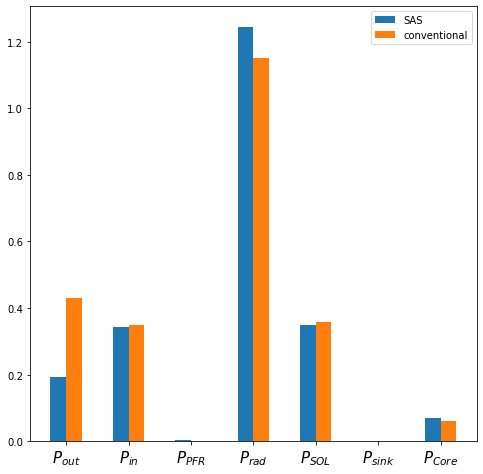

In [12]:
w=1
x = [1,5,9,13,17,21,25]
x1 =[]
x2 = []
for i in range(len(x)):
    x1.append(x[i]-w/2)
    x2.append(x[i]+w/2)
ticklabel = [r"$P_{out}$",r"$P_{in}$",r"$P_{PFR}$",r"$P_{rad}$",r"$P_{SOL}$",r"$P_{sink}$",r"$P_{Core}$"]
plt.figure(figsize=(8, 8))

plt.xticks(x,ticklabel,fontsize = 15)

plt.bar(x1, new_al_energy,width=w,label = "SAS")
plt.bar(x2, co_energy,width=w, label= "conventional")
plt.legend()
print(sum(new_al_energy))
print(sum(co_energy))

1.017887528223177
0.8723191172916861


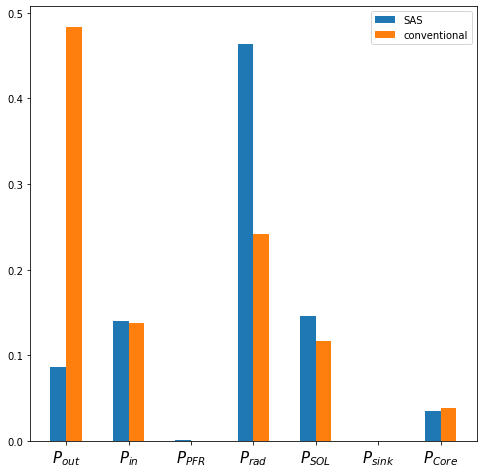

In [13]:
w=1
x = [1,5,9,13,17,21,25]
x1 =[]
x2 = []
for i in range(len(x)):
    x1.append(x[i]-w/2)
    x2.append(x[i]+w/2)
ticklabel = [r"$P_{out}$",r"$P_{in}$",r"$P_{PFR}$",r"$P_{rad}$",r"$P_{SOL}$",r"$P_{sink}$",r"$P_{Core}$"]
plt.figure(figsize=(8, 8))

plt.xticks(x,ticklabel,fontsize = 15)
plt.bar(x1, al_energy_7MW,width=w,label = "SAS")
plt.bar(x2, co_energy_7MW,width=w, label= "conventional")
plt.legend()
print(sum(co_energy_7MW))
print(sum(al_energy_7MW))

<BarContainer object of 7 artists>

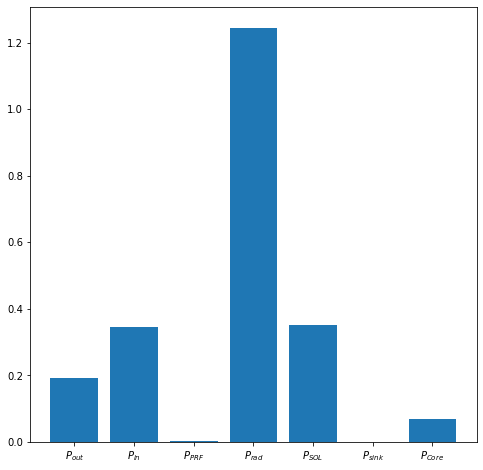

In [14]:
x = [r"$P_{out}$",r"$P_{in}$",r"$P_{PRF}$",r"$P_{rad}$",r"$P_{SOL}$",r"$P_{sink}$",r"$P_{Core}$"]
plt.figure(figsize=(8, 8))


plt.bar(x, new_al_energy)

In [15]:
nc_balance = netCDF4.Dataset("./balance2317.nc")

FileNotFoundError: [Errno 2] No such file or directory: b'./balance2317.nc'

In [ ]:
print(nc_balance)

In [ ]:
print(nc_balance.variables[u'b2stel_shi_ion_bal'][:])

In [ ]:
print(np.shape(nc_balance.variables[u'crx'][:]))